In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from artefatos.util import ScoreDistribution, PSI

In [53]:
def get_prediction():
    query = "Select * from `detection-sexist-statements.detect.sexist`"
    return pd.read_gbq(query)

In [54]:
df_prediction = get_prediction()
print(df_prediction.dtypes)
print(df_prediction.shape)
df_prediction.head()

request_datetime    datetime64[ns]
frase                       object
predict                     object
proba                      float64
dtype: object
(246, 4)


,request_datetime,frase,predict,proba
0,2021-12-16 17:32:16,Women can't play football!,sexista,0.8852
1,2021-12-16 17:32:21,Sassy - halfway between slut and classy,sexista,0.7179
2,2021-12-16 17:32:23,It seems like females never have valid opinion...,sexista,0.8786
3,2021-12-16 17:32:25,High positions better suit to men,sexista,0.6366
4,2021-12-16 17:32:31,I'm sorry but girls are just really unfunny,sexista,0.8347


In [55]:
df_prediction.predict.value_counts(normalize=True)

neutra/ambígua    0.565041
sexista           0.434959
Name: predict, dtype: float64

/home/jupyter/artefatos/util.py:1059: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  {"size": fontsize - 3},


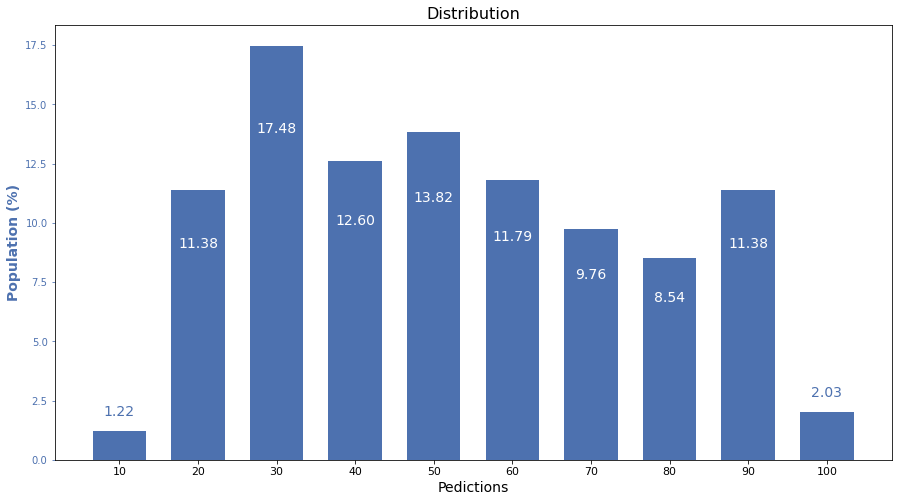

In [56]:
ScoreDistribution(df_prediction.proba).plot()

In [57]:
df_prediction_treino = pd.read_csv('artefatos/predicoes_de_treino_naive_bayes.csv')
print(df_prediction_treino.shape)
df_prediction_treino.head()

(342, 4)


,sentence,predicao,probabilidade,target
0,I can't stand working in an office with women ...,1,0.496994,1
1,That face she just pulled was hideous.,1,0.329856,1
2,"I've got an overactive brain. I enjoy work, I ...",0,0.754269,0
3,history shows us that empires fall when women ...,1,0.446949,1
4,Hard work is often the easy work you did not d...,0,0.779924,0


/home/jupyter/artefatos/util.py:1059: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  {"size": fontsize - 3},


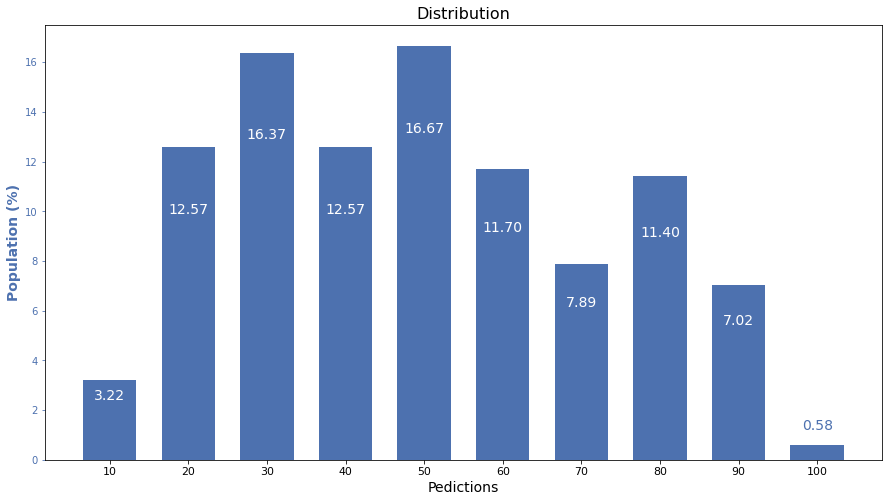

In [58]:
ScoreDistribution(df_prediction_treino.probabilidade).plot()

/home/jupyter/artefatos/util.py:1059: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  {"size": fontsize - 3},
/home/jupyter/artefatos/util.py:433: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  ], {'size': fontsize - 2})


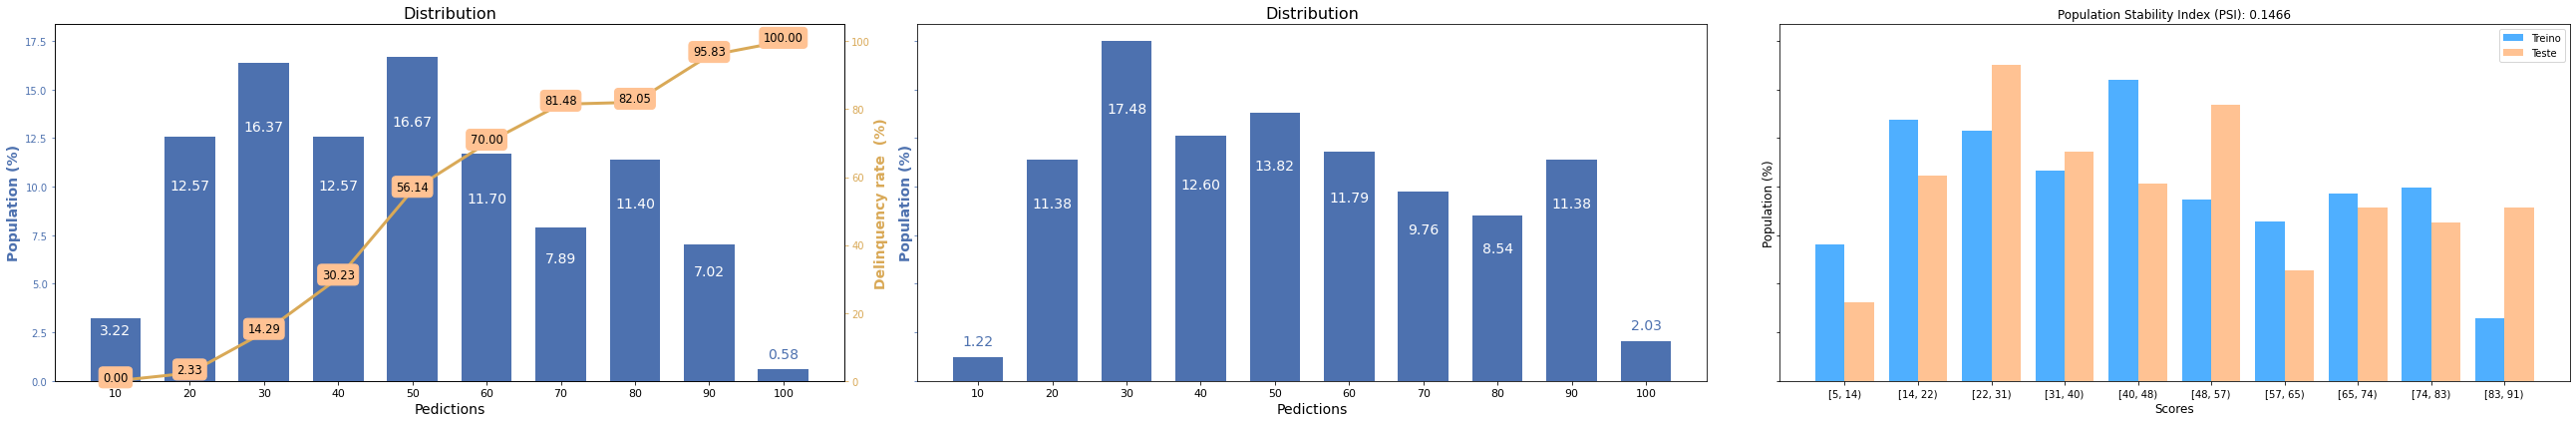

In [59]:
fig, axis = plt.subplots(1, 3, figsize=(36, 6), sharey=True)
ScoreDistribution(df_prediction_treino.probabilidade, df_prediction_treino.target).plot(ax=axis[0])
ScoreDistribution(df_prediction.proba).plot(ax=axis[1])
PSI(df_prediction_treino.probabilidade, df_prediction.proba).plot('Treino', 'Teste', ax=axis[2])
plt.tight_layout()
plt.show()

In [60]:
psi = PSI(df_prediction_treino.probabilidade, df_prediction.proba)
psi.value

0.14659011890191068

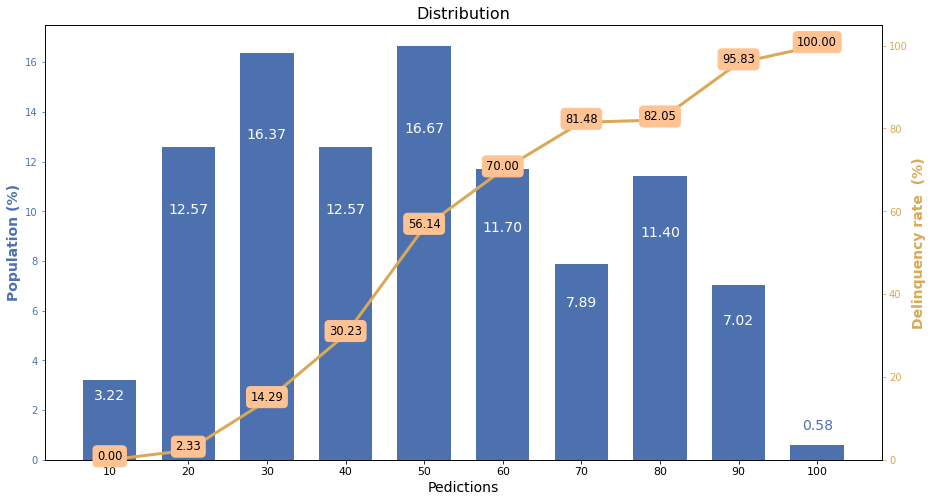

In [61]:
ScoreDistribution(df_prediction_treino.probabilidade, df_prediction_treino.target).plot()

/home/jupyter/artefatos/util.py:433: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  ], {'size': fontsize - 2})


<AxesSubplot:title={'center':'Population Stability Index (PSI): 0.1466'}, xlabel='Scores', ylabel='Population (%)'>

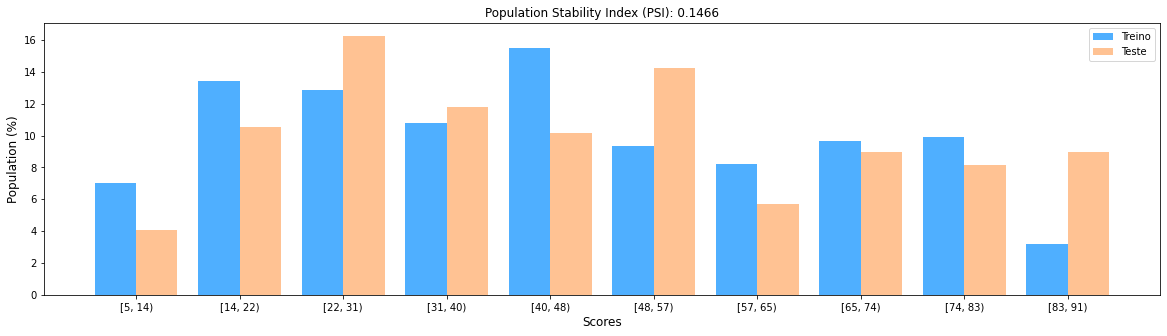

In [63]:
PSI(df_prediction_treino.probabilidade, df_prediction.proba).plot('Treino', 'Teste')